# Machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#importer les données Advertising.csv
frame1=pd.read_csv("advertising.csv",index_col=0)
frame1.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
import statsmodels.formula.api as smf

In [20]:
#on crée un modèle de régression
modele=smf.ols(formula="Sales ~ TV+Radio+Newspaper", data=frame1).fit()

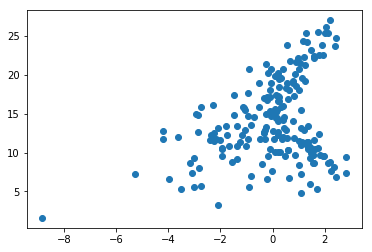

In [21]:
plt.scatter(modele.resid,frame1.Sales)

In [22]:
modele.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 16 Feb 2017   Prob (F-statistic):           1.58e-96
Time:                        14:48:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#avec scikit-learn
from sklearn.linear_model import LinearRegression

modele2=LinearRegression()

In [31]:
y=frame1["Sales"]
X=frame1[["TV","Newspaper","Radio"]]

In [32]:
#on ajuste le modele
modele2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
#on calcule le R²
modele2.score(X,y)

0.89721063817895208

In [43]:
#valeurs prédites avec le modèle
modele2.predict(X)
#coeff du modèle
modele2.coef_
#MSE
modele2.residues_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


556.82526290218721

In [44]:
from sklearn.cross_validation import train_test_split

In [45]:
#on construit les échantillons d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [47]:
modele3=LinearRegression()

In [48]:
modele3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
#rmse
np.sqrt(((y_test-modele3.predict(X_test))**2).sum())

12.546274331734462

In [52]:
#données NBA
frameNBA=pd.read_csv("nba_2013.csv")
frameNBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [53]:
frameNBA.shape

(481, 31)

In [54]:
#on supprime les données manqauntes
frameNBA.dropna(inplace=True)

In [55]:
frameNBA.shape

(403, 31)

In [57]:
#extraire les stats de TP
frameNBA[frameNBA["player"]=="Tony Parker"].iloc[0]

player          Tony Parker
pos                      PG
age                      31
bref_team_id            SAS
g                        68
gs                       68
mp                     1997
fg                      456
fga                     914
fg.                   0.499
x3p                      25
x3pa                     67
x3p.               0.373134
x2p                     431
x2pa                    847
x2p.               0.508855
efg.                  0.513
ft                      197
fta                     243
ft.                   0.811
orb                      17
drb                     138
trb                     155
ast                     388
stl                      36
blk                       9
tov                     151
pf                       86
pts                    1134
season            2013-2014
season_end             2013
Name: 344, dtype: object

In [58]:
frameNBA.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [59]:
y=frameNBA['pts']
X=frameNBA[['g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

In [62]:
#construction apprentissage / test
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [63]:
#kNN
from sklearn.neighbors import KNeighborsRegressor

In [64]:
modeleKNN = KNeighborsRegressor(n_neighbors=10)

In [65]:
modeleKNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [72]:
#on calcule les résidus
np.absolute(y_test-modeleKNN.predict(X_test))

441    111.0
175     69.3
185    286.4
241     21.8
283    155.7
157     44.5
173     31.6
91       9.3
43      73.0
477    235.7
299     15.4
393      2.4
251     44.5
147     16.5
373     27.7
328     15.7
142     48.5
327     10.4
302     27.9
92       0.3
197     14.2
41       3.6
155      4.5
124     69.9
451     13.7
415      0.3
216     18.7
82      13.9
138     28.5
381     19.6
       ...  
363     19.1
291     14.9
469     10.0
377    249.6
268     16.2
384     93.7
419     46.4
214     66.3
454     25.7
212    176.6
425      4.0
193     77.6
352     89.7
118     17.9
227      2.4
479     16.7
235      9.1
310     68.9
399     53.5
65      39.1
66      13.5
104    194.7
413     42.5
435      1.2
22      12.3
354     16.7
150     47.1
269     80.8
63      22.1
368     40.7
Name: pts, dtype: float64

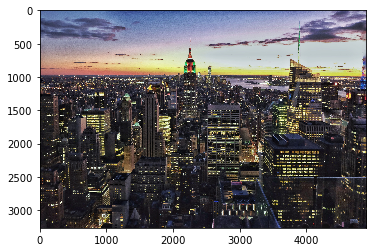

In [73]:
#k-means sur image
from scipy import misc
face = misc.imread('New York.jpg')
import matplotlib.pyplot as plt
plt.imshow(face)
plt.grid(False)


In [76]:
ny=face.reshape(-1,3)
ny.shape

(15980544, 3)

In [77]:
from sklearn.cluster import KMeans

In [78]:
modeleKM=KMeans(n_clusters=3)

In [79]:
ny=ny/255.0
ny

array([[ 0.33333333,  0.42352941,  0.63529412],
       [ 0.34117647,  0.43137255,  0.64313725],
       [ 0.34901961,  0.43921569,  0.65098039],
       ..., 
       [ 0.08627451,  0.08235294,  0.11372549],
       [ 0.08627451,  0.08235294,  0.11372549],
       [ 0.06666667,  0.0627451 ,  0.09411765]])

In [80]:
modeleKM.fit(ny)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
print(len(modeleKM.cluster_centers_))
len(modeleKM.labels_)

colors=modeleKM.cluster_centers_
labels=modeleKM.labels_

3


In [86]:
new_ny=colors[labels].reshape(face.shape)
new_ny=(new_ny*255.0).astype(np.uint8)

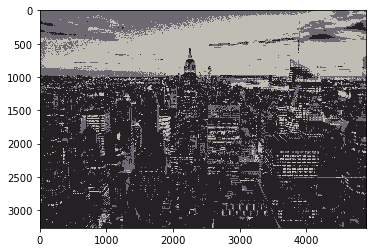

In [87]:
plt.imshow(new_ny)